In [1]:
import pandas as pd

In [2]:
from pathlib import Path

In [3]:
in_dir = Path('data/logs/step_log_2023-12-13_14-02.csv')

In [4]:
logs = [pd.read_csv('../../data/logs/step_log_2023-12-15_17-16.csv')]

In [5]:
# logs = []

# for f in in_dir.iterdir():
#     try:
#         this_log = pd.read_csv(f)
#     except:
#         print(f)

#     if '12-12_04-48' not in f.name:
#        continue

#     logs.append(this_log)

In [6]:
all_logs = pd.concat(logs)

In [7]:
all_logs.loc[all_logs['Cell Index'] == 740]

,Episode,Total Reward,Epsilon,Cell Index,Action Type,Reward,Energy Output,Unmet Demand


In [8]:
all_logs['Unmet Demand'].min()

24404386.0

In [9]:
all_logs = all_logs.reset_index()

In [10]:
all_logs['Unmet Demand'].argmin()

9897

In [11]:
all_logs['Epsilon'] = all_logs['Epsilon'].bfill()
all_logs['Episode'] = all_logs['Episode'].bfill()
all_logs['Total Reward'] = all_logs['Total Reward'].bfill()

In [12]:
all_logs = all_logs.sort_values(by=['Episode', 'index'], ascending=[True, True])
all_logs

,index,Episode,Total Reward,Epsilon,Cell Index,Action Type,Reward,Energy Output,Unmet Demand
0,0,1.0,56.431646,1.0,2932.0,wind,0.0,26642.0,57160857.0
1,1,1.0,56.431646,1.0,12754.0,wind,0.0,50100.0,57137399.0
2,2,1.0,56.431646,1.0,4246.0,wind,0.0,63175.0,57124324.0
3,3,1.0,56.431646,1.0,15758.0,wind,0.0,95422.0,57092077.0
4,4,1.0,56.431646,1.0,5447.0,solar,0.0,578972.0,56608527.0
...,...,...,...,...,...,...,...,...,...
15024,15024,NaN,NaN,NaN,6156.0,wind,0.0,53889486.0,25491412.0
15025,15025,NaN,NaN,NaN,2052.0,wind,-2.0,53889486.0,25491412.0
15026,15026,NaN,NaN,NaN,7969.0,wind,-2.0,53889486.0,25491412.0
15027,15027,NaN,NaN,NaN,15852.0,wind,0.0,53972666.0,25446652.0


In [13]:
res = all_logs.groupby(by='Episode').agg({'Total Reward': 'max', 'Unmet Demand': 'min', 
                                         'Epsilon': 'first'})

In [14]:
res['rolling_mean_reward'] = res['Total Reward'].rolling(5).mean()
res['rolling_mean_unmet'] = res['Unmet Demand'].rolling(5).mean()

In [15]:
res

,Total Reward,Unmet Demand,Epsilon,rolling_mean_reward,rolling_mean_unmet
Episode,,,,,
1.0,56.431646,26323798.0,1.000000,NaN,NaN
2.0,46.468478,24672539.0,0.965000,NaN,NaN
3.0,43.553117,25310321.0,0.931225,NaN,NaN
4.0,0.924016,26995099.0,0.898632,NaN,NaN
5.0,12.279322,25926004.0,0.867180,31.931316,25845552.2
6.0,8.570239,26804137.0,0.836829,22.359034,25941620.0
7.0,22.277251,26086189.0,0.807540,17.520789,26224350.0
8.0,-31.879459,25190211.0,0.779276,2.434274,26200328.0
9.0,-1.292213,26065309.0,0.752001,1.991028,26014370.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


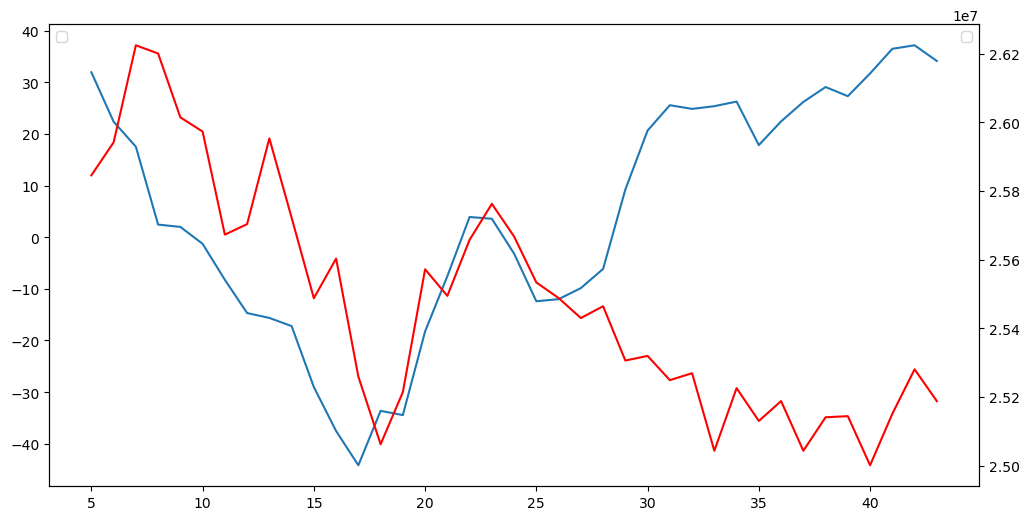

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
ax2 = ax.twinx()

#ax.plot(res['Total Reward'], label='reward', alpha=0.7, linewidth=1.5,)
ax.plot(res['rolling_mean_reward'], label=None, linewidth=1.5, color='C0')
#ax2.plot(res['Unmet Demand'], color='red', label='unmet demand', alpha=0.7, linewidth=1.5)
ax2.plot(res['rolling_mean_unmet'], label=None, linewidth=1.5, color='red')

ax.legend(loc='upper left')
ax2.legend(loc='upper right')

In [17]:
res.index.values

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43.])

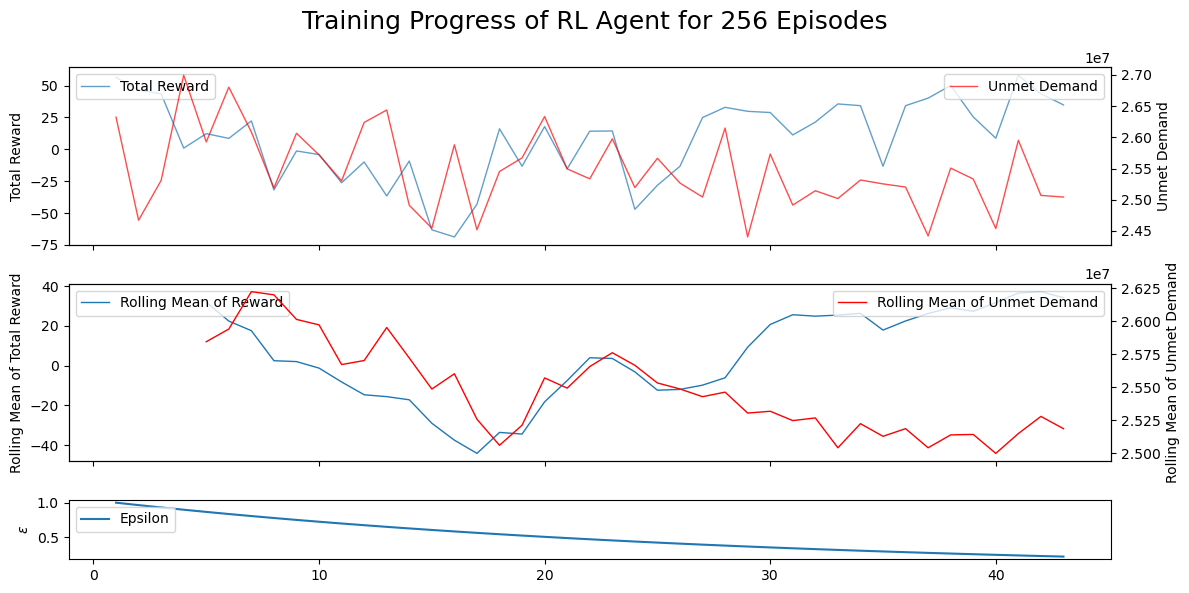

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 6), gridspec_kw={'height_ratios': [3, 3, 1]}, sharex=True)

ax_flat = ax.flatten()

ax0_0 = ax_flat[0]
ax0_1 = ax0_0.twinx()
ax1_0 = ax_flat[1]
ax1_1 = ax1_0.twinx()
ax2_0 = ax_flat[2]

ax0_0.plot(res.index.values, res['Total Reward'], label='Total Reward', alpha=0.7, linewidth=1)
ax0_1.plot(res.index.values, res['Unmet Demand'], color='red', label='Unmet Demand', alpha=0.7, linewidth=1)
ax0_0.set_ylabel('Total Reward')
ax0_1.set_ylabel('Unmet Demand')
ax0_0.legend(loc='upper left')
ax0_1.legend(loc='upper right')

ax1_0.plot(res.index.values, res['rolling_mean_reward'], linewidth=1, label='Rolling Mean of Reward')
ax1_1.plot(res.index.values, res['rolling_mean_unmet'], linewidth=1, color='red', label='Rolling Mean of Unmet Demand')
ax1_0.set_ylabel('Rolling Mean of Total Reward')
ax1_1.set_ylabel('Rolling Mean of Unmet Demand')
ax1_0.legend(loc='upper left')
ax1_1.legend(loc='upper right')

ax2_0.plot(res.index.values, res['Epsilon'], label='Epsilon')
ax2_0.set_ylabel('$\epsilon$')
ax2_0.legend(loc='upper left')

plt.suptitle('Training Progress of RL Agent for 256 Episodes', size=18)
plt.tight_layout()
plt.savefig('../../figures/final_model_training_logs.png', dpi=300)

In [19]:
# %matplotlib inline



# plt.scatter(best_unmet, rewards)

In [20]:
(all_logs.groupby(by=['Episode', 'Cell Index']).size().sort_values() == 2).sum()

1377

In [21]:
(all_logs.groupby(by=['Episode', 'Cell Index']).size().sort_values() == 1).sum()

11282

In [22]:
all_logs.groupby(by='Cell Index').size().quantile(0.95)

22.0

In [23]:
choice_groups = all_logs.groupby(by='Cell Index').agg({'index': 'count', 'Reward': 'mean'})
choice_groups = choice_groups.rename(columns={'index': 'n_times_chosen', 'Reward': 'mean_reward'})
choice_groups

,n_times_chosen,mean_reward
Cell Index,,
1556.0,3,0.000000
1557.0,29,-0.413793
1558.0,6,-0.666667
1653.0,2,-1.000000
1655.0,2,0.000000
...,...,...
18248.0,4,-0.500000
18249.0,5,0.000000
18250.0,1,0.000000


In [24]:
all_logs['Episode'].max()

43.0

In [25]:
choice_groups.groupby(by='n_times_chosen')['mean_reward'].mean()

n_times_chosen
1     0.000000
2    -0.082695
3    -0.127473
4    -0.154088
5    -0.170370
        ...   
60   -0.583333
61   -0.622951
63   -0.666667
64   -0.843750
66   -0.848485
Name: mean_reward, Length: 62, dtype: float64

In [26]:
choice_groups.loc[choice_groups['n_times_chosen'] == 29]

,n_times_chosen,mean_reward
Cell Index,,
1557.0,29,-0.413793
2943.0,29,-0.137931
3661.0,29,-0.413793
7119.0,29,-0.206897
8422.0,29,-0.137931
8530.0,29,-0.206897
10053.0,29,-0.137931
13640.0,29,-0.137931


In [27]:
all_logs.loc[all_logs['Cell Index'] == 1859].sort_values(by='Episode')

,index,Episode,Total Reward,Epsilon,Cell Index,Action Type,Reward,Energy Output,Unmet Demand


In [28]:
choice_groups.loc[choice_groups['n_times_chosen'] == 12]

,n_times_chosen,mean_reward
Cell Index,,
6327.0,12,0.000000
7146.0,12,0.000000
7740.0,12,-0.500000
10047.0,12,-0.166667
10146.0,12,-0.333333
10567.0,12,-0.500000
11461.0,12,0.000000
11517.0,12,-0.333333
15256.0,12,-0.500000


In [29]:
action_type_agg_count = all_logs.groupby(by=['Episode', 'Action Type']).size()
action_type_agg_count.name = 'count'
action_type_agg_count = action_type_agg_count.reset_index()

unmet_demand = all_logs.groupby(by='Episode').agg({'Unmet Demand': 'min'})
total_reward = all_logs.groupby(by='Episode').agg({'Total Reward': 'last'})

action_type_agg_count = action_type_agg_count.merge(unmet_demand, on='Episode', how='left')
action_type_agg_count = action_type_agg_count.merge(total_reward, on='Episode', how='left')

Text(0, 0.5, 'Unmet Demand at End of Episode')

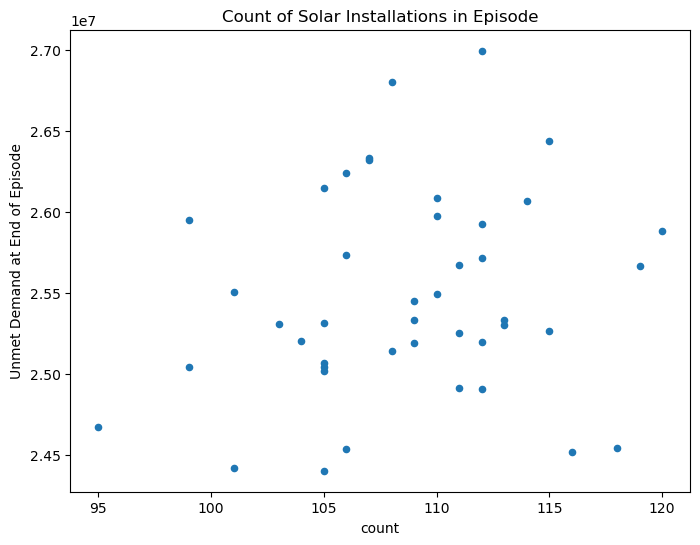

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))

action_type_agg_count.loc[action_type_agg_count['Action Type'] == 'solar'].plot.scatter('count', 'Unmet Demand', title='Count of Solar Installations in Episode', ax=ax)

ax.set_ylabel('Unmet Demand at End of Episode')

Text(0, 0.5, 'Total Reward at End of Episode')

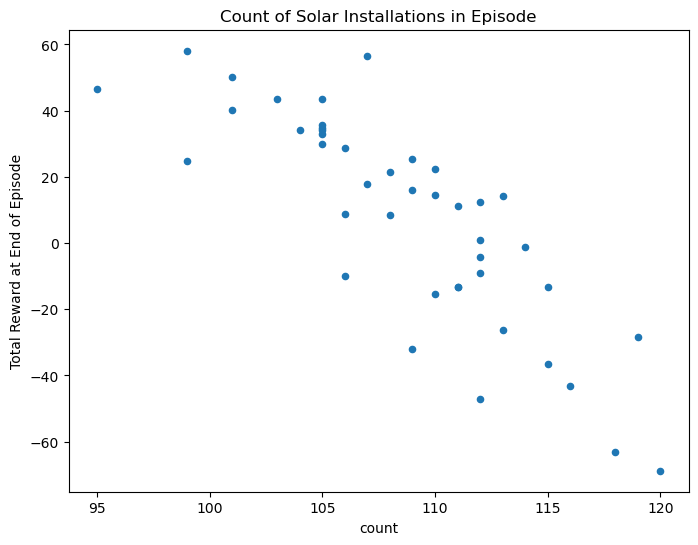

In [31]:
fig, ax = plt.subplots(figsize=(8, 6))

action_type_agg_count.loc[action_type_agg_count['Action Type'] == 'solar'].plot.scatter('count', 'Total Reward', title='Count of Solar Installations in Episode', ax=ax)

ax.set_ylabel('Total Reward at End of Episode')

In [32]:
action_type_agg_count.sort_values(by='Unmet Demand')

,Episode,Action Type,count,Unmet Demand,Total Reward
56,29.0,solar,105,24404386.0,29.793093
57,29.0,wind,255,24404386.0,29.793093
72,37.0,solar,101,24421154.0,40.148094
73,37.0,wind,258,24421154.0,40.148094
33,17.0,wind,276,24519252.0,-43.086746
...,...,...,...,...,...
25,13.0,wind,215,26438553.0,-36.601990
11,6.0,wind,202,26804137.0,8.570239
10,6.0,solar,108,26804137.0,8.570239
6,4.0,solar,112,26995099.0,0.924016


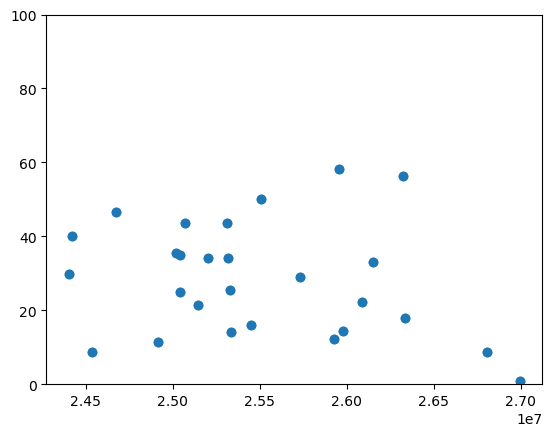

In [33]:
plt.scatter(action_type_agg_count['Unmet Demand'], action_type_agg_count['Total Reward'])
plt.ylim([0,100])
plt.show()

In [34]:
action_type_agg_count.sort_values(by='Episode')

,Episode,Action Type,count,Unmet Demand,Total Reward
0,1.0,solar,107,26323798.0,56.431646
1,1.0,wind,191,26323798.0,56.431646
2,2.0,solar,95,24672539.0,46.468478
3,2.0,wind,257,24672539.0,46.468478
4,3.0,solar,103,25310321.0,43.553117
...,...,...,...,...,...
81,41.0,wind,211,25953462.0,58.091984
83,42.0,wind,227,25069836.0,43.569344
82,42.0,solar,105,25069836.0,43.569344
85,43.0,wind,221,25043825.0,34.834787
